# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

# House Keeping and Quick Data Investigation

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

In [9]:
word_bank = pd.read_json('data/world_bank_projects.json') # load in the data using pandas
word_bank.head() # see what we're working with

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


# Question 1: Find the Top 10 Countries with the Most Projects

In [10]:
word_bank_countries = word_bank.groupby('countryname')[['project_name']].count() 
    # group the data by country and count the number of project names that are not NaNs
    # double [[]] so that we keep it as a pd.DataFrame
word_bank_countries.columns = ['number_of_projects'] 
    # re-name the column of the new dataframe so that it makes more sense
top_10 = word_bank_countries.sort_values('number_of_projects', ascending=False)[0:10] 
    # sort the data frame by the value in project name in descending order, 
    # and keep the first 10 values
print(top_10.index) # print the results

Index(['People's Republic of China', 'Republic of Indonesia',
       'Socialist Republic of Vietnam', 'Republic of India',
       'Republic of Yemen', 'People's Republic of Bangladesh', 'Nepal',
       'Kingdom of Morocco', 'Republic of Mozambique', 'Africa'],
      dtype='object', name='countryname')


# Question 2: Find the Top 10 Major Project Themes

In [11]:
word_bank_namecodes = list(word_bank['mjtheme_namecode']) # grab the name codes 
    # the column name appears to be a dictionary in each row, so save it as a list of dictionaries

theme_name = [] # set up a blank list to add to 

for index, value in enumerate(word_bank_namecodes): # enumerate list and go through the index and vals
    json_list = json_normalize(value) # normalize the data in each row
    theme_name.extend(json_list.name) # and add the name to the list

theme_name = pd.DataFrame(theme_name) # convert to pandas df
theme_name.columns = ['Name'] # rename the column so it makes more sense
#theme_name = theme_name[theme_name['Name'] != ''] # noticed there are some blanks so take that out
theme_name = theme_name['Name'].value_counts() # get the counts for each theme name
ten_names = theme_name[0:10] # save the top ten most common theme names
print(ten_names.index) # print result

Index(['Environment and natural resources management', 'Rural development',
       'Human development', 'Public sector governance',
       'Social protection and risk management',
       'Financial and private sector development', '',
       'Social dev/gender/inclusion', 'Trade and integration',
       'Urban development'],
      dtype='object')


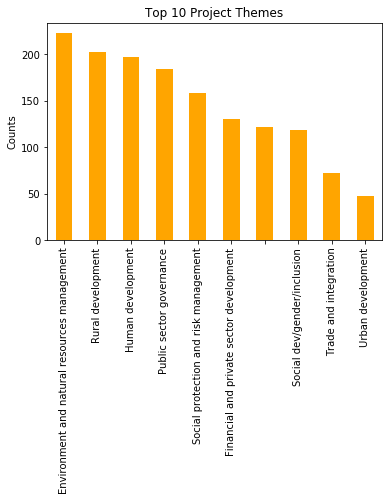

In [12]:
# Visualize the data.

theme_name[0:10].plot(kind='bar',y='Name', color='orange') # use a bar graph to plot the most common project 
plt.title('Top 10 Project Themes') # add a title
plt.ylabel('Counts') # add a y-label
plt.show() # show the plot

# Question 3: Fill in Missing Theme Names

In [13]:
word_bank_namecodes = list(word_bank['mjtheme_namecode']) # grab the name codes 
    # the column name appears to be a dictionary in each row, so save it as a list of dictionaries

theme_name = [] # set up a blank list to add to 
theme_code = [] # set up a blank list to add to

for index, value in enumerate(word_bank_namecodes): # enumerate list and go through the index and vals
    json_list = json_normalize(value) # normalize the data in each row
    theme_name.extend(json_list.name) # and add the name to the list
    theme_code.extend(json_list.code) # add the code to the list  
    
themes = pd.DataFrame(theme_name, theme_code).reset_index() # add the lists to a dataframe and reset the index
themes.columns = ['code', 'name'] # change the column names so they make more sense
themes = themes.sort_values(['code','name']) # sort the data by code first and name next
    # this allows all codes to be in the right order, and blanks to come before any other name
themes = themes.replace("", method='bfill') # backfill to add in names

themes = themes.set_index('code') # to make sure they're all the same, set the index as the code number
test_values = themes.to_dict() # convert to a dictionary
print(test_values) # and print out the dictionary to make sure that values are not repeated with different names

{'name': {'1': 'Economic management', '10': 'Rural development', '11': 'Environment and natural resources management', '2': 'Public sector governance', '3': 'Rule of law', '4': 'Financial and private sector development', '5': 'Trade and integration', '6': 'Social protection and risk management', '7': 'Social dev/gender/inclusion', '8': 'Human development', '9': 'Urban development'}}


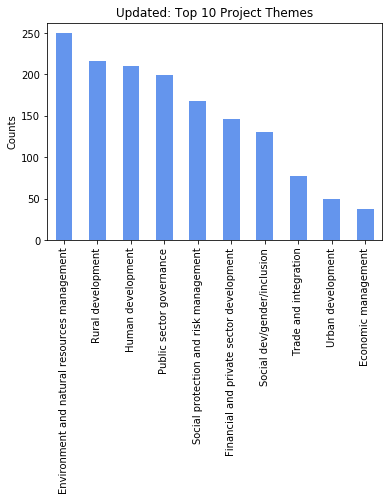

In [14]:
# Visualize the data to see how the plot changed once we took out blank values

new_theme_count = themes['name'].value_counts() # get the value counts in the new dataframe

new_theme_count[0:10].plot(kind='bar',y='name', color='cornflowerblue') # use a bar graph to plot the most common projects 
plt.title('Updated: Top 10 Project Themes') # add a title
plt.ylabel('Counts') # add a label
plt.show() # show the plot